# Data Preprocess (MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

# 데이터 불러오기
TensorFlow에서 제공해주는 데이터셋(MNIST) 예제 불러오기 

In [3]:
from tensorflow.keras import datasets

- 데이터 shape 확인하기

In [4]:
mnist=datasets.mnist

In [5]:
mnist=datasets.mnist

In [6]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [7]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [8]:
train_x.shape

(60000, 28, 28)

In [9]:
test_x.shape

(10000, 28, 28)

In [10]:
train_y.shape

(60000,)

# Image Dataset 들여다보기

불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인

- 데이터 하나만 뽑기

In [14]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
image=train_x[2]

In [16]:
image.shape

(28, 28)

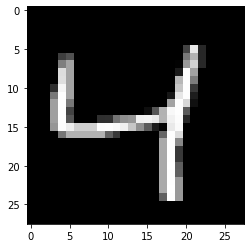

In [27]:
plt.imshow(image,'gray')
plt.show()

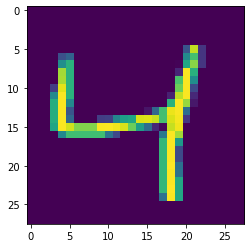

In [57]:
plt.imshow(image)

- 시각화해서 확인

# Channel 관련

[Batch Size, Height, Width, Channel]  
GrayScale이면 1, RGB이면 3으로 만들어줘야함

- 다시 shape로 데이터 확인

In [28]:
train_x.shape

(60000, 28, 28)

- 데이터 차원수 늘리기 (numpy)

In [29]:
new_train_x=np.expand_dims(train_x,-1)

In [30]:
new_train_x.shape

(60000, 28, 28, 1)

- TensorFlow 패키지 불러와 데이터 차원수 늘리기 (tensorflow)

In [31]:
new_train_x=tf.expand_dims(train_x,-1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

- TensorFlow 공홈에서 가져온 방법 tf.newaxis

In [32]:
train_x.shape

(60000, 28, 28)

In [29]:
train_x[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [32]:
reshaped=train_x.reshape([60000,28,28,1])
reshaped.shape

(60000, 28, 28, 1)

In [37]:
reshaped=train_x.reshape([60000,28,28,1])

*주의 사항  
matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번째 dimension이 없으므로,  
2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

- new_train_x[0] -> new_train_x[0, :, :, 0]

In [35]:
new_train_x=train_x[...,tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

In [43]:
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [44]:
disp=new_train_x[0,:,:,0]

In [46]:
disp.shape

TensorShape([28, 28])

In [47]:
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [49]:
np.squeeze(new_train_x).shape

(60000, 28, 28)

In [36]:
np.squeeze(new_train_x[0]).shape

(28, 28)

In [51]:
new_train_x.shape

TensorShape([60000, 28, 28, 1])

In [54]:
disp=np.squeeze(new_train_x[0])
disp.shape

(28, 28)

- 다시 시각화

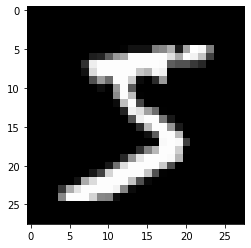

In [55]:
plt.imshow(disp,'gray')
plt.show()

# Label Dataset 들여다보기  

Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지. 어떤 식으로 저장 되어있는지 확인

- label 하나만 뽑아보기

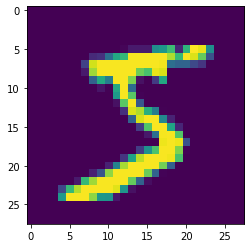

In [56]:
plt.imshow(train_x[0])

In [40]:
train_y.shape

(60000,)

In [41]:
train_y[0]

5

- Label 시각화 

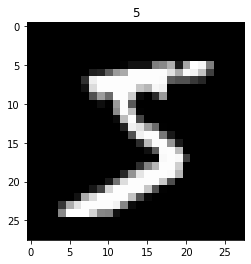

In [42]:
plt.title(train_y[0])
plt.imshow(train_x[0],'gray')
plt.show()

# OneHot Encoding



컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

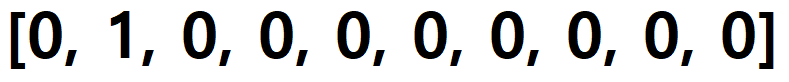

In [58]:
# 5
[0,0,0,0,0,1,0,0,0,0]

# 9
[0,0,0,0,0,0,0,0,0,1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- tensorflow.keras.utils.to_categorical

In [59]:
from tensorflow.keras.utils import to_categorical

- 1을 예시로 one hot encoding

In [37]:
to_categorical(1,5)

array([0., 1., 0., 0., 0.], dtype=float32)

- label 확인해서 to_categorical 사용

In [61]:
label2=train_y[1]

In [62]:
label2

0

In [64]:
label3=train_y[2]
label3

4

In [63]:
label=train_y[0]
label

5

In [68]:
from tensorflow.keras.utils import to_categorical

In [72]:
label_onehot=to_categorical(label,num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- onehot encoding으로 바꾼 것과 이미지 확인

C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


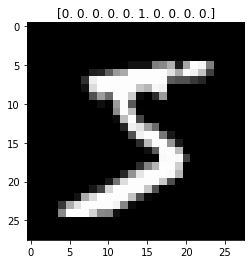

In [73]:
plt.title(label_onehot)
plt.imshow(train_x[0], 'gray')
plt.show()